In [1]:
import json
import os
import re
import string

from cltk.tokenize.word import WordTokenizer
from cltk.stem.lemma import LemmaReplacer
from nltk.translate import AlignedSent, Alignment, IBMModel1, IBMModel2
from nltk.tokenize import wordpunct_tokenize
from nltk.translate.ibm_model import AlignmentInfo

In [3]:
lat_tokenizer = WordTokenizer('latin')
eng_tokenizer = wordpunct_tokenize
lem = LemmaReplacer('latin')

MemoryError: 

In [7]:
def get_sentence_pair(alignments):
    for a in alignments:
        for s in a:
            #for s in p:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            yield [lat_sent,eng_sent]

In [8]:
def tokenize_sentences(sent,tok):
    tokens = []
    if type(sent) == list:
        for s in sent:
            s = re.sub(r'[{}]'.format(string.punctuation),'',s).lower()
            s = re.sub(r'  *', ' ', s)
            tokens += tok(s.lower())
    else:
        sent = re.sub(r'[{}]'.format(string.punctuation),'',sent).lower()
        sent = re.sub(r'  *', ' ', sent)
        tokens += tok(sent)
        
    return tokens

In [ ]:
os.chdir('../aligned_sentences/')

In [10]:
bitext = []

for f in os.listdir()[2:]:
    of = open(f)
    aligned_sentences = json.loads(of.read())
    of.close()

    for a in aligned_sentences:
        for s in a:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            if len(lat_sent) == 0 or len(eng_sent) == 0:
                continue
            bitext.append(AlignedSent(lat_sent,eng_sent))

of = open('amm_lat_sentences.json')
aligned_sentences = json.loads(of.read())
of.close()

for a in aligned_sentences:
    for p in a:
        for s in p:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            #while '' in lat_sent:
            #    lat_sent.remove('')
            #lat_sent = lem.lemmatize(lat_sent)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            if len(lat_sent) == 0 or len(eng_sent) == 0:
                continue
            bitext.append(AlignedSent(lat_sent,eng_sent))

In [35]:
lat_mod = IBMModel2(bitext,5)

In [107]:
eng_bitext = []

for f in os.listdir()[2:]:
    of = open(f)
    aligned_sentences = json.loads(of.read())
    of.close()

    for a in aligned_sentences:
        for s in a:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            if len(lat_sent) == 0 or len(eng_sent) == 0:
                continue
            eng_bitext.append(AlignedSent(eng_sent, lat_sent))

of = open('amm_lat_sentences.json')
aligned_sentences = json.loads(of.read())
of.close()

for a in aligned_sentences:
    for p in a:
        for s in p:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            #while '' in lat_sent:
            #    lat_sent.remove('')
            #lat_sent = lem.lemmatize(lat_sent)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            if len(lat_sent) == 0 or len(eng_sent) == 0:
                continue
            eng_bitext.append(AlignedSent(eng_sent,lat_sent))

In [108]:
eng_mod = IBMModel2(bitext,5)

In [109]:
print('Done')

Done


In [103]:
lat_mod.best_model2_alignment(AlignedSent(['vir', 'mittit','florem'],['the','dog','sleeps']))

In [104]:
ba = _

In [105]:
ba.alignment

(0, 3, 2, 2)

In [82]:
ba.alignment = (0,0,1,2)

In [106]:
lat_mod.prob_t_a_given_s(ba)

1e-12

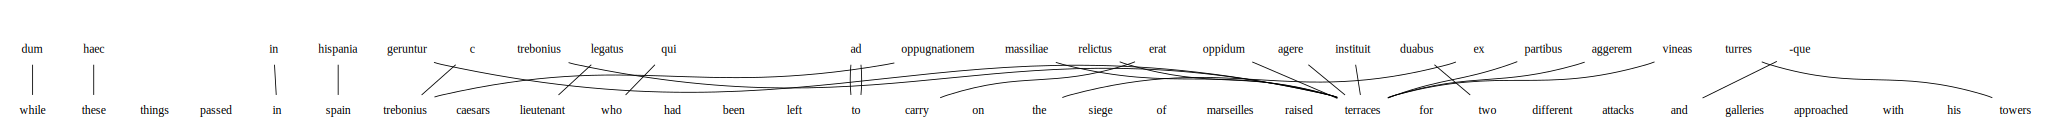

In [123]:
bitext[0]

In [34]:
len(bitext)

13842

In [313]:
a = Alignment([(0,0),(1,1),(2,2)])

In [64]:
al = [AlignedSent(['puer','amat','puella'],['boy','loves','girl'])]

In [122]:
water = eng_mod.translation_table['arcem']

import operator

sorted_x = sorted(water.items(), key=operator.itemgetter(1),reverse=True)

sorted_x

[('citadel', 0.17142007944119067),
 ('staberius', 0.1016191797391818),
 ('completing', 0.060146557344354694),
 ('salinator', 0.05554025315206978),
 ('interdependence', 0.05471996562931752),
 ('badness', 0.049402749976107545),
 ('catapults', 0.02173889976520044),
 ('pliably', 0.02173889976520044),
 ('crashed', 0.02173889976520044),
 ('admonish', 0.015625033134159878),
 ('sow', 0.01562502272126847),
 ('tipped', 0.014139310364194904),
 ('strings', 0.002253100272365951),
 ('workmen', 0.0020237957627165393),
 ('pregnant', 0.00020861007555897352),
 ('osiers', 6.654730460908814e-05),
 ('terrace', 8.616617764342048e-06),
 ('drove', 4.714883585195484e-06),
 ('castle', 2.0223125710357427e-06),
 ('propositions', 1.0563913556387552e-06),
 ('trebonius', 7.472636960516562e-07),
 ('curves', 6.250716189281086e-07),
 ('dismissed', 2.798386000185529e-07),
 ('varro', 2.6029530530804157e-07),
 ('carmona', 3.5635864630982505e-09),
 ('report', 5.15852226201059e-10),
 ('fortified', 7.436267534451306e-11),
 (

In [265]:
l.alignment

(0, 1, 0, 2)

In [217]:
l.src_sentence

(None, 'boy', 'loves', 'girl')

In [218]:
l.trg_sentence

('UNUSED', 'puer', 'amat', 'puellam')

In [71]:
bitext[3].alignment

Alignment([(0, 3), (1, 63), (2, 5), (3, 50), (4, 50), (5, 6), (6, 12), (7, 3), (8, 21), (9, 24), (10, 23), (11, 19), (12, 20), (13, 63), (14, 50), (15, 30), (16, 6), (17, 72), (18, 3), (19, 6), (20, 36), (21, 55), (22, 3), (23, 41), (24, 54), (25, 63), (26, 74), (27, 3), (28, 35), (29, 6), (30, 46), (31, 54), (32, 3), (33, 47), (34, 50), (35, 50), (36, 62), (37, 3), (38, 66), (39, 78), (40, 20), (41, 67), (42, 77), (43, 79), (44, 64), (45, 3)])

In [126]:
b = 1
for a in bitext[b].alignment:
    w = a[0]
    m = a[1]
    if w == None:
        word = 'None'
    else:
        word = bitext[b].words[w]
    if m == None:
        mot = 'None'
    else:
        mot = bitext[b].mots[a[1]]
        
    print('{} : {}'.format(word,mot))

hispania : spain
quod : which
adiacet : empties
qua : rhone
-que : the
ad : the
ostium : empties
altera : side
portu : port
portam : empties
gallia : gaul
atque : and
una : one
mare : sea
est : None
erat : was
proxima : attacks
navalibus : empties
ad : towards
aditus : empties
ad : the
id : the
rhodani : rhone
ex : of


In [165]:
bitext[-900].words

['quidam',
 'cataplasmo',
 'calfacientibus',
 'uto',
 'eo1',
 'multus',
 'pondus',
 'noceo',
 'quis1',
 'vesica',
 'urgeo',
 'vulnus',
 'irrito1',
 'qui1',
 'calor1',
 'proficio']

In [70]:
for b in range(len(bitext)):
    for a in bitext[b].alignment:
        print('{} : {}'.format(bitext[b].words[a[0]],bitext[b].mots[a[1]]))

per : by
iuvant : incursion
ordinatus : reconnoitring
bellis : involved
eum : him
moventem : incursion
dederit : makes
mesopotamiam : mesopotamia
nostra : territories
quadam : policy
ferocissimas : stage
isauriam : incursion
arma : frontiers


TypeError: list indices must be integers or slices, not NoneType

In [58]:
bitext[3].words[8]

'ab'

In [59]:
bitext[3].mots[60]

'from'

In [23]:
mod = IBMModel1.train(bitext)

TypeError: train() missing 1 required positional argument: 'parallel_corpus'

In [16]:
mod.translation_table['rex']['king']

0.5675554043221417

In [287]:
mod.translation_table['regina']['queen']

0.6156239752345138

In [279]:
mod.prob_of_alignments(['hic','puer','amat'],['this','boy','loves'],[(0, 0), (1, 1), (2, 2), (3, None), (4, 3)])

TypeError: prob_of_alignments() takes 2 positional arguments but 4 were given

In [297]:
mod.align(bitexts[0])

AttributeError: 'IBMModel2' object has no attribute 'align'

In [295]:
al_s = AlignedSent(['puer','amat','puellam'],['the','boy','loves','the','girl'],a)

In [293]:
a = Alignment([(0,1),(1,2),(2,4)])

In [298]:
bitext[0].src_sentence

AttributeError: 'AlignedSent' object has no attribute 'src_sentence'